In [125]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


### Importing necessary libraries:::::::::::::

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

## EDA and Preprocessing:::::::

In [127]:
ccDataset = pd.read_csv("./data/CreditCardDataset.csv")

In [128]:
ccDataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11.0,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12.0,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [129]:
ccDataset.shape

(57355, 31)

In [130]:
ccDataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [131]:
ccDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  float64
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

##### We have Class as the target and other as the features for fraud detection.

In [132]:
ccDataset['Class'].unique()

array([0, 1], dtype=int64)

##### We have two class 1 and 0 as fraud and non-fraud, this is binary classification problem.

In [133]:
ccDataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

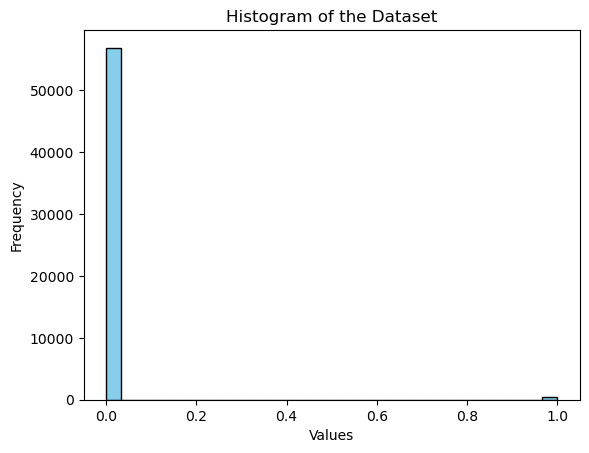

In [134]:
# Checking the total fraud and non fraud data:::::::::::::
plt.hist(ccDataset['Class'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Dataset')
plt.show()

#### from the histogram above, we can see that the frequency of the 0 i.e. non fraud is very very high which means our detection will be baised towards non fraud if we use data like this, so we have to balance this.

In [135]:
X = ccDataset.drop('Class', axis=1)
y = ccDataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to oversample the minority class:::::
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

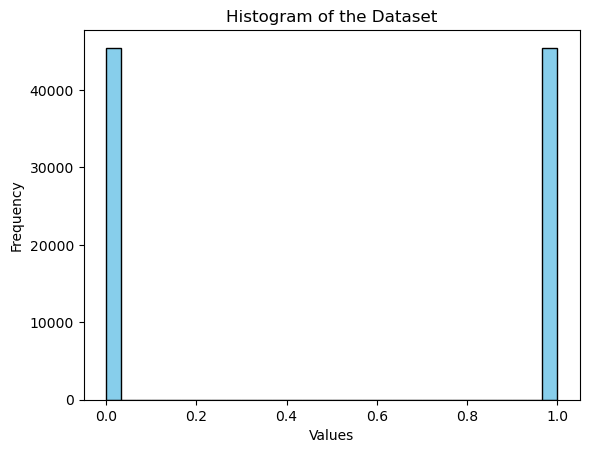

In [136]:
# Checking if the class is balanced or not::::
plt.hist(y_train_smote, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Dataset')
plt.show()

In [137]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

## Implementing a Neural Network using PyTorch::::

In [138]:
X_train_tensor = torch.tensor(X_train_smote_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_smote.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [139]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x



In [140]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [146]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training the model
epochs = 50
for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor.view(-1, 1))
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_losses.append(test_loss.item())
        
        # Compute accuracy
        train_pred = torch.round(outputs)
        train_accuracy = accuracy_score(y_train_tensor, train_pred)
        train_accuracies.append(train_accuracy)
        
        test_pred = torch.round(test_outputs)
        test_accuracy = accuracy_score(y_test_tensor, test_pred)
        test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss.item()}, validation Loss: {test_loss.item()}, Training Accuracy: {train_accuracy}, validation Accuracy: {test_accuracy}')


Epoch 1/50, Training Loss: 0.45883092284202576, validation Loss: 0.435574471950531, Training Accuracy: 0.9072966375651486, validation Accuracy: 0.9927643623049429
Epoch 2/50, Training Loss: 0.44778555631637573, validation Loss: 0.4242367744445801, Training Accuracy: 0.908143293822708, validation Accuracy: 0.9929387150204865
Epoch 3/50, Training Loss: 0.4367332458496094, validation Loss: 0.4126681983470917, Training Accuracy: 0.9087260572207684, validation Accuracy: 0.9928515386627147
Epoch 4/50, Training Loss: 0.42570608854293823, validation Loss: 0.40089643001556396, Training Accuracy: 0.9092098607965167, validation Accuracy: 0.9927643623049429
Epoch 5/50, Training Loss: 0.4147379994392395, validation Loss: 0.38894858956336975, Training Accuracy: 0.9099685527675764, validation Accuracy: 0.9928515386627147
Epoch 6/50, Training Loss: 0.40387028455734253, validation Loss: 0.37685495615005493, Training Accuracy: 0.9104963384865744, validation Accuracy: 0.9928515386627147
Epoch 7/50, Train

### Plot training loss and validation loss

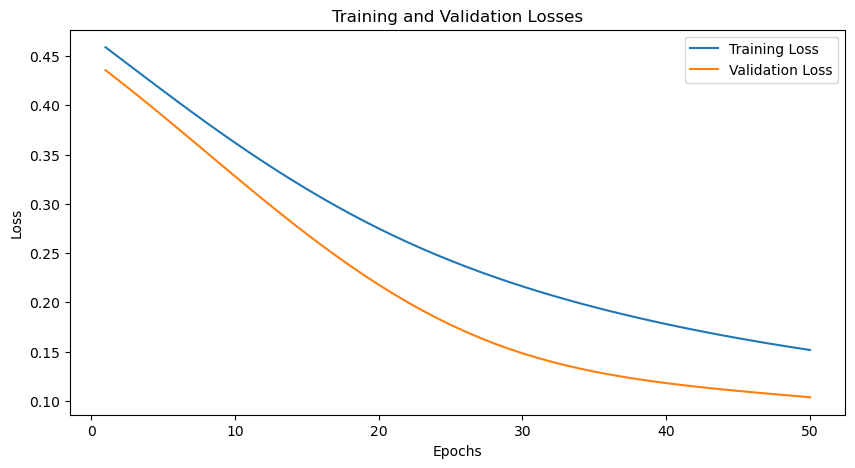

In [147]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

### Plot training accuracy and validation accuracy

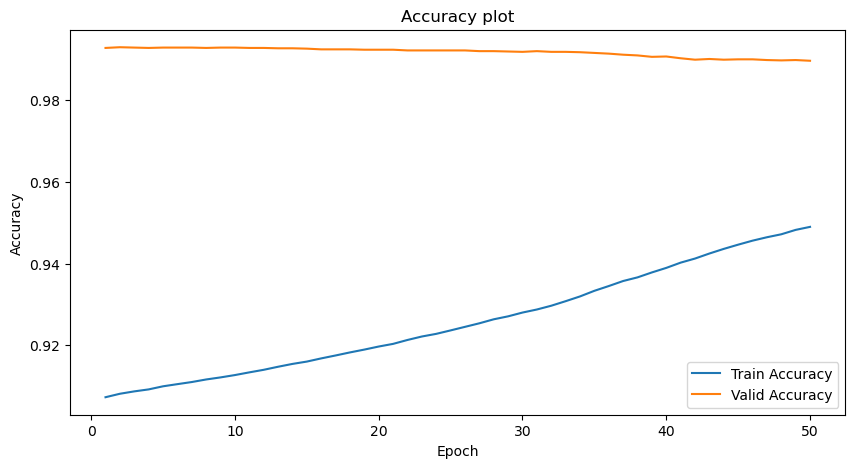

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.legend()
plt.show()

In [154]:
print("Classification Report:")
print(classification_report(y_test, test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11390
           1       0.39      0.81      0.53        81

    accuracy                           0.99     11471
   macro avg       0.69      0.90      0.76     11471
weighted avg       0.99      0.99      0.99     11471



### Conclusion::::

So, We build a neural network for the classification of the transaction as fraud and non fraud using pytorch. We also balanced the dataset as it was imbalanced by the high frequecy of the non-fraud data. After Epoch 50; We achieved Training Loss: 0.15168029069900513, validation Loss: 0.10378885269165039, Training Accuracy: 0.9489807138301849, validation Accuracy: 0.9896260134251591. We also did the plot for the loss and accuracy on the trainning and validation dataset. Both shows the similar pattern on both dataset. Overall, we have 99% accuracy of the model. The precision for class 0 is shown 100% whilst it has shown 39% for 1.